Combined dataset shape: (920, 14)
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  
age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalach      55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
target        0
dtype: int64
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
re

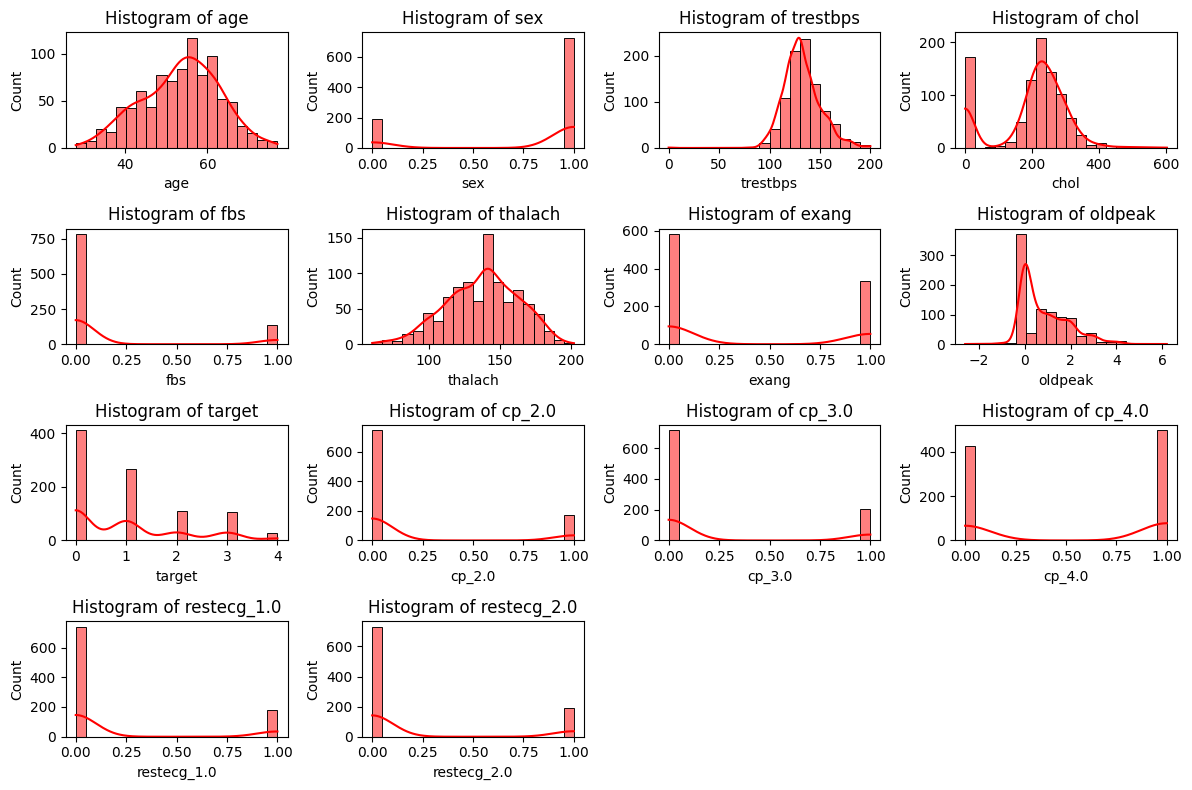

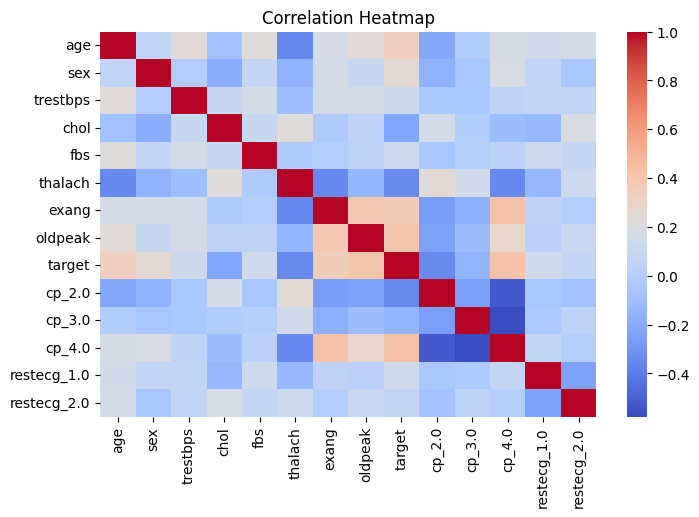

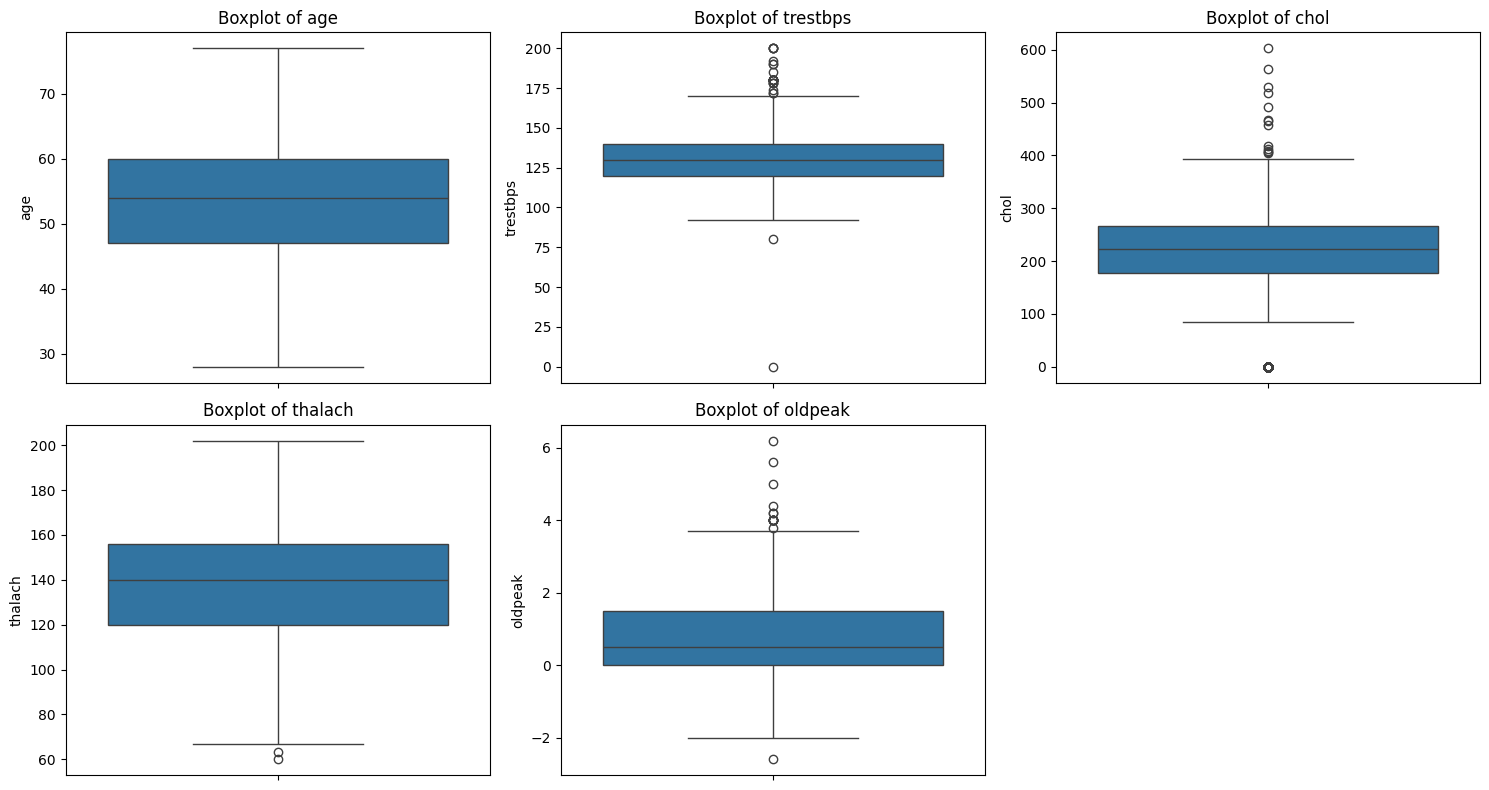

Data preprocessing completed!


In [ ]:

import numpy as np
import pandas as pd
import zipfile
from pathlib import Path
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.makedirs('data', exist_ok=True)
os.makedirs('notebooks', exist_ok=True)  
os.makedirs('models', exist_ok=True)
os.makedirs('results', exist_ok=True)
os.makedirs('ui', exist_ok=True)

# Define column names from heart-disease.names
col_names = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]
zip_path = Path(r"C:\Users\tech shop\Desktop\heart+disease.zip")
processed_files = [
    "processed.cleveland.data",
    "processed.hungarian.data",
    "processed.switzerland.data",
    "processed.va.data"
]
dfs = []
#This loop reads each of the four processed dataset files from inside the zip file
# cleans them and stores them in a list then we merge them into one dataset
with zipfile.ZipFile(zip_path, "r") as z:
# Opens the ZIP file (heart+disease.zip) in read mode 
    for fname in processed_files:
        with z.open(fname) as f:
            temp = pd.read_csv(
                f,
                header=None,
                names=col_names,
                na_values="?",        
# missing values marked as ?
                skipinitialspace=True
            )
            dfs.append(temp)

df = pd.concat(dfs, ignore_index=True)
print("Combined dataset shape:", df.shape)
print(df.head())
print(df.isnull().sum())

#handle missing data
df = df.drop(columns=["slope", "ca", "thal"]) #drop cols that have too many missing values
# Fill numeric columns with median
for col in ["trestbps","chol","oldpeak","thalach"]:
    df[col]=df[col].fillna(df[col].median())
# Fill categorical/binary columns with mode
for col in ["fbs","restecg","exang"]:
    df[col]=df[col].fillna(df[col].mode()[0]) # gives 0.0 (a single number) so it means take the first most common value.

print(df.isnull().sum()) # no more missing values

#one hot encoding
df_encoded= pd.get_dummies(df,columns=["cp","restecg"],drop_first=True  )
print("after encoding:\n",df_encoded.head())

df_encoded.to_csv('data/heart_disease.csv', index=False)
print("Data saved to data/heart_disease.csv")


#Scaling so that all values are within the same range 
# Separate features and target
X = df_encoded.drop("target", axis=1)
# DataFrame containing only the input features.
y = df_encoded["target"]
# Series with the target 

# Standardization
scaler = StandardScaler()
# Fit and transform the features
X_scaled = scaler.fit_transform(X)

#histogram
plt.figure(figsize=(12, 8))
for i, column in enumerate(df_encoded.columns, 1):
    plt.subplot(4, 4, i)  # create a grid of plots
    sns.histplot(df_encoded[column], kde=True, bins=20, color="red")
    plt.title(f"Histogram of {column}")
plt.tight_layout()
plt.show()

#correlation heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df_encoded.corr(), annot=False, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#boxplot
plt.figure(figsize=(15, 8))
continuous_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]
#continous values only
for i, column in enumerate(continuous_cols, 1):
    plt.subplot(2, 3, i)  
    sns.boxplot(y=df_encoded[column])
    plt.title(f"Boxplot of {column}")
plt.tight_layout()
plt.show()
print("Data preprocessing completed!")